In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\californiadataset\housing.csv")  # Replace with your actual file path


In [4]:

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.shape

(20640, 10)

In [9]:
df.isnull().values.any()

np.True_

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

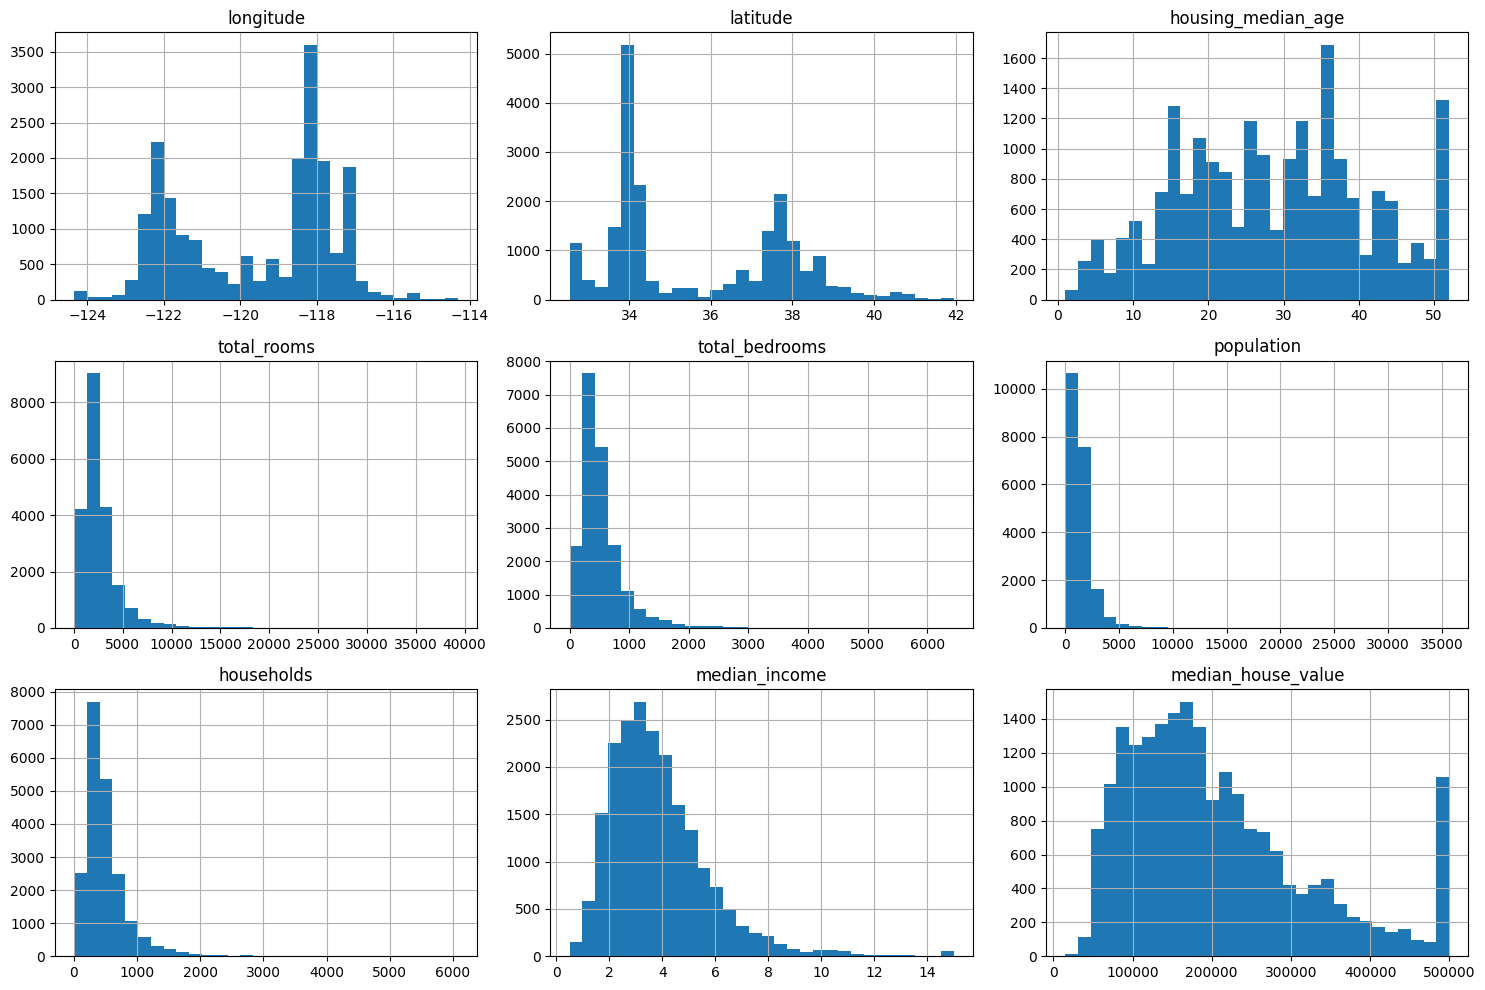

<Axes: xlabel='median_house_value'>

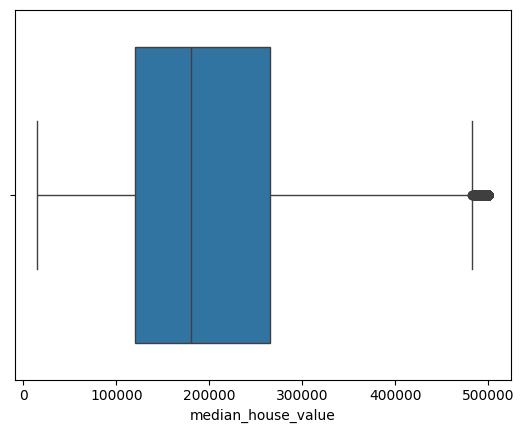

In [17]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()
sns.boxplot(x=df['median_house_value'])

there are outliers in the data check the boxplot

In [18]:
import numpy as np

df['total_rooms_log'] = np.log1p(df['total_rooms'])  # log1p handles 0s
df['total_bedrooms_log'] = np.log1p(df['total_bedrooms'])
df['population_log'] = np.log1p(df['population'])
df['households_log'] = np.log1p(df['households'])


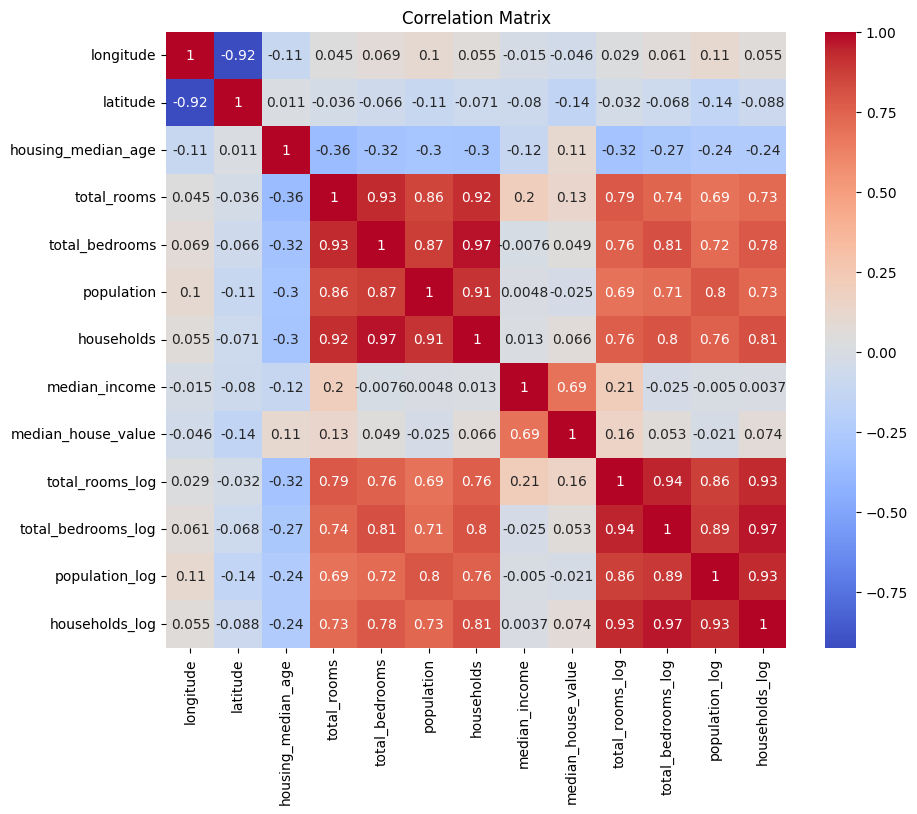

In [22]:
# Only include numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

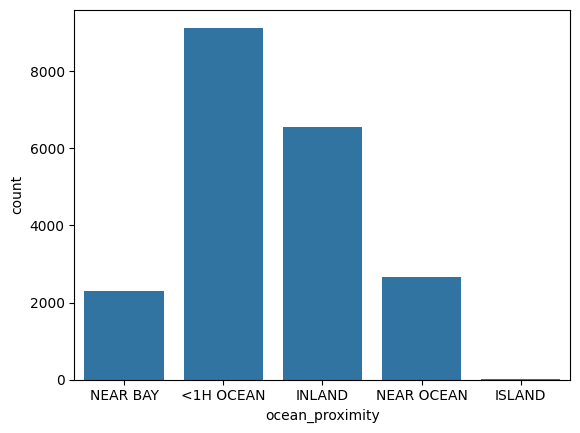

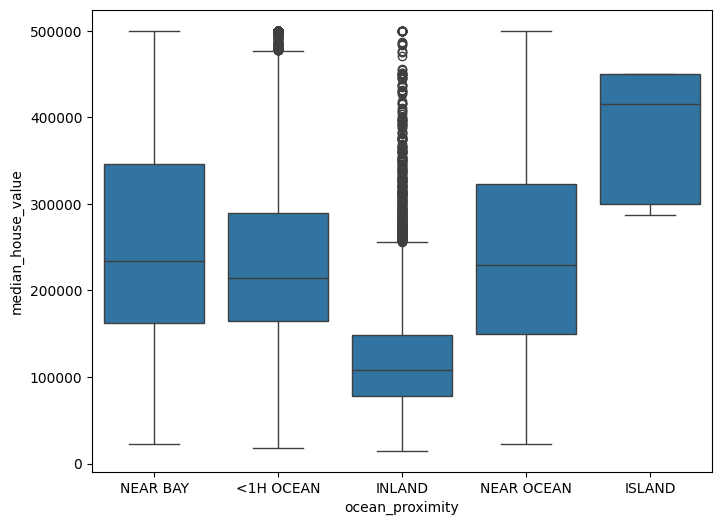

In [21]:
# Countplot
sns.countplot(x='ocean_proximity', data=df)

# Boxplot to see impact on price
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)


In [24]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Use it
df_no_outliers = remove_outliers_iqr(df, 'median_house_value')



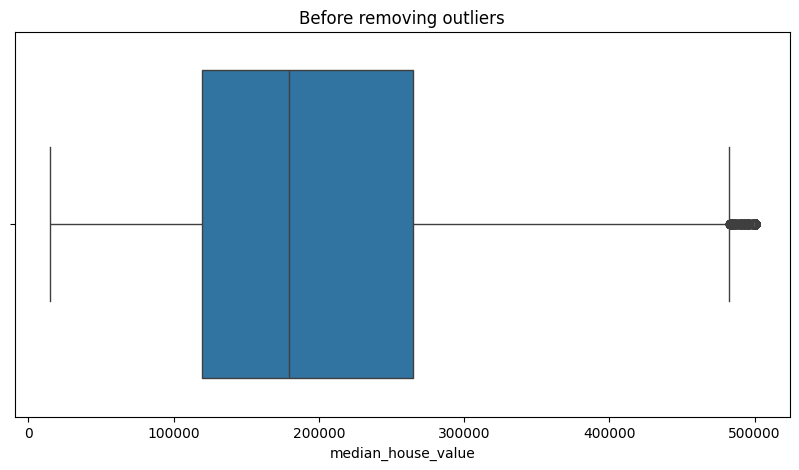

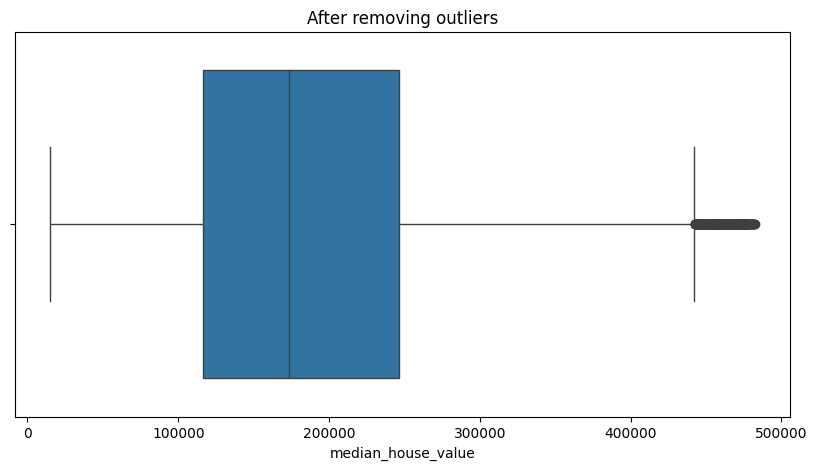

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='median_house_value')
plt.title("Before removing outliers")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df_no_outliers, x='median_house_value')
plt.title("After removing outliers")
plt.show()


In [27]:
df_no_outliers = df[df['median_house_value'] < 500001]


Traing the model using LinearRegression 

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\californiadataset\housing.csv")  # Replace with your actual file path

# 3. Handle missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# 4. One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# 5. Define feature columns and target
features = [
    'longitude', 'latitude', 'housing_median_age', 
    'total_rooms', 'total_bedrooms', 'population', 
    'households', 'median_income', 
    'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'
]
target = 'median_house_value'

# 6. Split into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# 8. Make predictions

# Make sure X_test is a DataFrame with column names
y_pred = model.predict(X_test)  # X_test is a DataFrame, no warning


# 9. Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 10. Predict on new data (example input)
sample_input = np.array([[-122.2, 37.8, 30, 2000, 400, 900, 300, 5.0, 0, 0, 1, 0]])  # Adjust accordingly
predicted_price = model.predict(sample_input)
print(f"Predicted house price: ${predicted_price[0]:,.2f}")

RMSE: 70060.52
R²: 0.6254
Predicted house price: $275,877.66


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate
def evaluate_model(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")

evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")


Random Forest - RMSE: 49038.21, MAE: 31639.37, R2: 0.8165
XGBoost - RMSE: 47309.13, MAE: 31645.73, R2: 0.8292


In [34]:
import numpy as np

# Example new data point (adjust values accordingly)
sample_input = np.array([[-119.5, 34.0, 25, 2500, 450, 1100, 350, 4.5, 1, 0, 0, 1]])  # Modify based on feature importance

# Reshape if needed (ensure it matches the model's expected format)
sample_input = sample_input.reshape(1, -1)

# Predict using the trained model
predicted_price = model.predict(sample_input)
print(f"Predicted house price: ${predicted_price[0]:,.2f}")

Predicted house price: $240,634.05


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


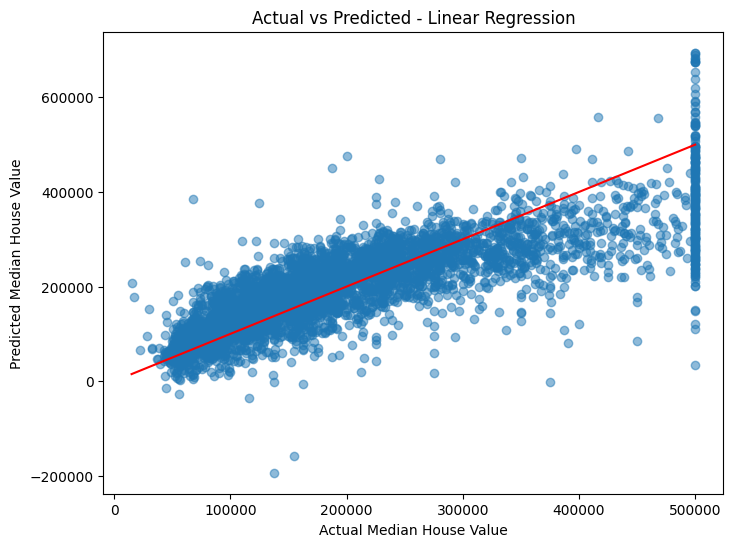

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


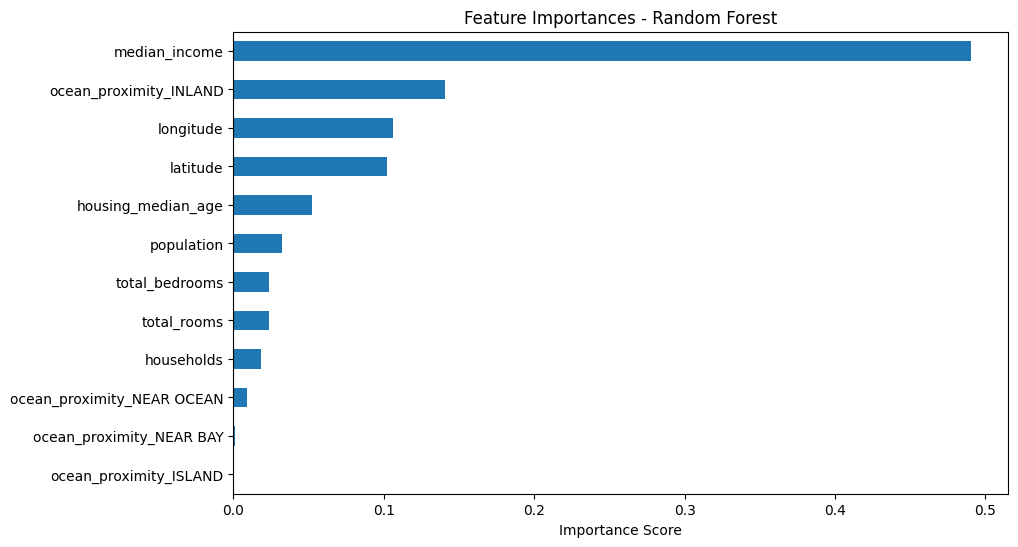

In [39]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)  # or xgb_model
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [41]:
move house Prediction model.ipynb r"C:\Users\Dell\OneDrive\Desktop\python files\califorinahousingmodel"


SyntaxError: invalid syntax (2144286832.py, line 1)